In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

# 1. Import Data

In [3]:
#csv데이터셋을 호출.
data = pd.read_csv('E:\\kimybeom\\공모전\\2022_2023_youth_addiction.csv')

In [3]:
data.head(5)

,YEAR,drug_use,female,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,GAD,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
0,2022,0,0,1.0,1.0,0,1,0,2.0,0,2,0,0,7,0,0,0,0,0
1,2022,0,0,1.0,1.0,0,1,0,0.0,0,2,1,0,8,0,0,0,0,0
2,2022,0,0,1.0,1.0,0,1,0,0.0,0,2,1,0,7,0,0,0,0,0
3,2022,0,0,1.0,1.0,0,1,0,2.0,0,1,0,2,7,0,0,0,1,0
4,2022,0,0,2.0,1.0,0,1,0,1.0,1,2,0,0,9,0,0,0,1,0


### 훈련(train) 데이터셋과 테스트(test) 데이터셋 만들기

In [3]:
from sklearn.model_selection import train_test_split

# 입력(features)과 타겟(target) 분리
# 예를 들어, 데이터셋의 마지막 열이 타겟 데이터라고 가정.
X = data.iloc[:, :-1].values  # 모든 행, 마지막 열을 제외한 모든 열
y = data.iloc[:, -1].values   # 모든 행, 마지막 열

# 데이터를 8:2 비율로 나누기
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# numpy 배열을 pandas 데이터프레임으로 변환하여 결합
train = pd.DataFrame(X_train)
train['target'] = y_train

test = pd.DataFrame(X_test)
test['target'] = y_test

# 훈련 데이터셋과 테스트 데이터셋을 각각 CSV 파일로 저장
train.to_csv('train.csv', index=False)
test.to_csv('test.csv', index=False)

# 결과 출력
print("훈련 데이터 셋의 크기:", X_train.shape, y_train.shape)
print("테스트 데이터 셋의 크기:", X_test.shape, y_test.shape)

훈련 데이터 셋의 크기: (83784, 18) (83784,)
테스트 데이터 셋의 크기: (20946, 18) (20946,)


In [4]:
df_train = pd.read_csv('E:\\kimybeom\\공모전\\train.csv')

df_test = pd.read_csv('E:\\kimybeom\\공모전\\test.csv')

In [4]:
df_train.head(5)

,YEAR,drug_use,female,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,GAD,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
0,2022,0,1,0.0,1.0,2,0,2,0.0,0,2,1,1,7,0,0,0,0,0
1,2023,0,0,0.0,1.0,1,0,2,1.0,0,1,1,1,8,0,1,0,0,0
2,2023,0,1,0.0,1.0,0,1,2,2.0,1,0,1,1,13,1,1,0,0,0
3,2023,0,1,0.0,1.0,1,1,1,0.0,1,0,2,1,15,2,1,0,0,0
4,2022,0,0,1.0,1.0,0,0,2,2.0,1,1,0,1,10,1,0,0,0,0


In [7]:
df_test.head(5)

,YEAR,drug_use,female,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,GAD,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
0,2023,0,1,2.0,1.0,1,0,1,2.0,0,0,1,1,12,1,1,0,0,0
1,2023,0,0,1.0,1.0,0,0,2,0.0,0,1,0,1,10,1,0,0,1,0
2,2023,0,1,0.0,1.0,0,0,1,1.0,0,1,1,1,17,2,0,0,0,0
3,2022,0,0,1.0,4.0,0,1,0,1.0,1,1,2,0,10,1,0,0,0,0
4,2023,0,0,1.0,1.0,0,1,0,2.0,1,0,0,0,7,0,0,0,0,0


# 변수 설명.

**drug_use:** 습관적 약물사용.    
아니요: 0, 예: 1.  


**female:** 성별.  
남자: 0, 여자: 1.  


**E_ses_group:** 경제 수준.  
상: 0, 중: 1, 하: 2.  


**E_RES:** 거주 형태.  
가족과 거주: 1, 친척 거주: 2, 하숙/자취: 3, 기숙사: 4, 보육시설: 5.  


**ctype_group:** 지역.  
대도시: 0, 중소도시: 1, 군지역; 2.  


**mh_group:** 학년 구분.  
중학교: 0, 고등학교: 1.  


**stype_group:** 학교 구분.  
남학교: 0, 여학교: 1, 남여공학: 2.  


**E_S_RCRD_group:** 학업 성적.  
상: 0, 중: 1, 하: 2.  


**PR_HT_group:** 건강상태.  
건강: 0, 보통: 1.


**M_STR_group:** 스트레스 정도.  
많음: 0, 보통: 1, 적음: 2.  


**M_SLP_EN_group:** 수면 정도.  
충분: 0, 보통: 1, 적음: 2.  


**M_LON_group:** 외로움 정도.  
없음: 0, 보통: 1, 있음: 2.  


**gad_group:** 불안 정도.  
경미 불안: 0, 중도 불안: 1, 중증 불안: 2.  


**M_SAD_group:** 슬픔 또는 절망감의 정도.  
안 느낌: 0, 느낌: 1.  


**TC_LT_group:** 흡연경험.  
없음: 0, 있음: 1.  


**aC_LT_group:** 음주경험.  
없음: 0, 있음: 1.  


**V_TRT_group:** 폭력경험.  
없음: 0, 1~2번: 1, 3회 이상: 2.

In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 83784 entries, 0 to 83783
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            83784 non-null  int64  
 1   drug_use        83784 non-null  int64  
 2   female          83784 non-null  int64  
 3   E_ses_group     83778 non-null  float64
 4   E_RES           83774 non-null  float64
 5   ctype_group     83784 non-null  int64  
 6   mh_group        83784 non-null  int64  
 7   stype_group     83784 non-null  int64  
 8   E_S_RCRD_group  83779 non-null  float64
 9   PR_HT_group     83784 non-null  int64  
 10  M_STR_group     83784 non-null  int64  
 11  M_SLP_EN_group  83784 non-null  int64  
 12  M_LON_group     83784 non-null  int64  
 13  GAD             83784 non-null  int64  
 14  gad_group       83784 non-null  int64  
 15  M_SAD_group     83784 non-null  int64  
 16  TC_LT_group     83784 non-null  int64  
 17  aC_LT_group     83784 non-null 

In [23]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20946 entries, 0 to 20945
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   YEAR            20946 non-null  int64  
 1   drug_use        20946 non-null  int64  
 2   female          20946 non-null  int64  
 3   E_ses_group     20944 non-null  float64
 4   E_RES           20944 non-null  float64
 5   ctype_group     20946 non-null  int64  
 6   mh_group        20946 non-null  int64  
 7   stype_group     20946 non-null  int64  
 8   E_S_RCRD_group  20944 non-null  float64
 9   PR_HT_group     20946 non-null  int64  
 10  M_STR_group     20946 non-null  int64  
 11  M_SLP_EN_group  20946 non-null  int64  
 12  M_LON_group     20946 non-null  int64  
 13  GAD             20946 non-null  int64  
 14  gad_group       20946 non-null  int64  
 15  M_SAD_group     20946 non-null  int64  
 16  TC_LT_group     20946 non-null  int64  
 17  aC_LT_group     20946 non-null 

In [5]:
#float형을 int형으로 바꾸기 위해 NaN값을 제거.
df_train = df_train.dropna()
df_test = df_test.dropna()

# 특정 열을 float에서 int로 변환 (훈련 데이터셋)
df_train["E_ses_group"] = df_train["E_ses_group"].astype(int)
df_train["E_RES"] = df_train["E_RES"].astype(int)
df_train["E_S_RCRD_group"] = df_train["E_S_RCRD_group"].astype(int)

# 특정 열을 float에서 int로 변환 (테스트 데이터셋)
df_test["E_ses_group"] = df_test["E_ses_group"].astype(int)
df_test["E_RES"] = df_test["E_RES"].astype(int)
df_test["E_S_RCRD_group"] = df_test["E_S_RCRD_group"].astype(int)

In [6]:
#데이터셋의 전반적인 정보(데이터 프레임을 구성하는 행과 열의 크기, 컬럼명, 데이터 타입)
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83774 entries, 0 to 83783
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   YEAR            83774 non-null  int64
 1   drug_use        83774 non-null  int64
 2   female          83774 non-null  int64
 3   E_ses_group     83774 non-null  int32
 4   E_RES           83774 non-null  int32
 5   ctype_group     83774 non-null  int64
 6   mh_group        83774 non-null  int64
 7   stype_group     83774 non-null  int64
 8   E_S_RCRD_group  83774 non-null  int32
 9   PR_HT_group     83774 non-null  int64
 10  M_STR_group     83774 non-null  int64
 11  M_SLP_EN_group  83774 non-null  int64
 12  M_LON_group     83774 non-null  int64
 13  GAD             83774 non-null  int64
 14  gad_group       83774 non-null  int64
 15  M_SAD_group     83774 non-null  int64
 16  TC_LT_group     83774 non-null  int64
 17  aC_LT_group     83774 non-null  int64
 18  V_TRT_group     83774 non-

In [6]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20944 entries, 0 to 20945
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   YEAR            20944 non-null  int64
 1   drug_use        20944 non-null  int64
 2   female          20944 non-null  int64
 3   E_ses_group     20944 non-null  int32
 4   E_RES           20944 non-null  int32
 5   ctype_group     20944 non-null  int64
 6   mh_group        20944 non-null  int64
 7   stype_group     20944 non-null  int64
 8   E_S_RCRD_group  20944 non-null  int32
 9   PR_HT_group     20944 non-null  int64
 10  M_STR_group     20944 non-null  int64
 11  M_SLP_EN_group  20944 non-null  int64
 12  M_LON_group     20944 non-null  int64
 13  GAD             20944 non-null  int64
 14  gad_group       20944 non-null  int64
 15  M_SAD_group     20944 non-null  int64
 16  TC_LT_group     20944 non-null  int64
 17  aC_LT_group     20944 non-null  int64
 18  V_TRT_group     20944 non-

In [7]:
#'DataFrame.loc'이용해서 사용할 컬럼만 추출.
df_train = df_train.loc[:, ['drug_use', 'female', 'E_ses_group', 'E_RES', 'ctype_group', 'mh_group', 'stype_group', 'E_S_RCRD_group', 'PR_HT_group', 'M_STR_group', 'M_SLP_EN_group', 'M_LON_group', 'gad_group', 'M_SAD_group', 'TC_LT_group', 'aC_LT_group', 'V_TRT_group']]
df_test = df_test.loc[:, ['drug_use', 'female', 'E_ses_group', 'E_RES', 'ctype_group', 'mh_group', 'stype_group', 'E_S_RCRD_group', 'PR_HT_group', 'M_STR_group', 'M_SLP_EN_group', 'M_LON_group', 'gad_group', 'M_SAD_group', 'TC_LT_group', 'aC_LT_group', 'V_TRT_group']]

In [7]:
#성공
df_train.info()
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 83774 entries, 0 to 83783
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   drug_use        83774 non-null  int64
 1   female          83774 non-null  int64
 2   E_ses_group     83774 non-null  int32
 3   E_RES           83774 non-null  int32
 4   ctype_group     83774 non-null  int64
 5   mh_group        83774 non-null  int64
 6   stype_group     83774 non-null  int64
 7   E_S_RCRD_group  83774 non-null  int32
 8   PR_HT_group     83774 non-null  int64
 9   M_STR_group     83774 non-null  int64
 10  M_SLP_EN_group  83774 non-null  int64
 11  M_LON_group     83774 non-null  int64
 12  gad_group       83774 non-null  int64
 13  M_SAD_group     83774 non-null  int64
 14  TC_LT_group     83774 non-null  int64
 15  aC_LT_group     83774 non-null  int64
 16  V_TRT_group     83774 non-null  int64
dtypes: int32(3), int64(14)
memory usage: 10.5 MB
<class 'pandas.core.fram

In [8]:
#습관적 약물 사용을 한 사람과 안한 사람을 선언.
#df0 = 습관적 약물 사용 안함, df1= 습관전 약물 사용 함.
df0_train = df_train[df_train['drug_use'] == 0] #train셋에서 사용 x
df1_train = df_train[df_train['drug_use'] == 1] #rain셋에서 사용 o

df0_test = df_test[df_test['drug_use'] == 0] #test셋에서 사용 x
df1_test = df_test[df_test['drug_use'] == 1] #test셋에서 사용 x

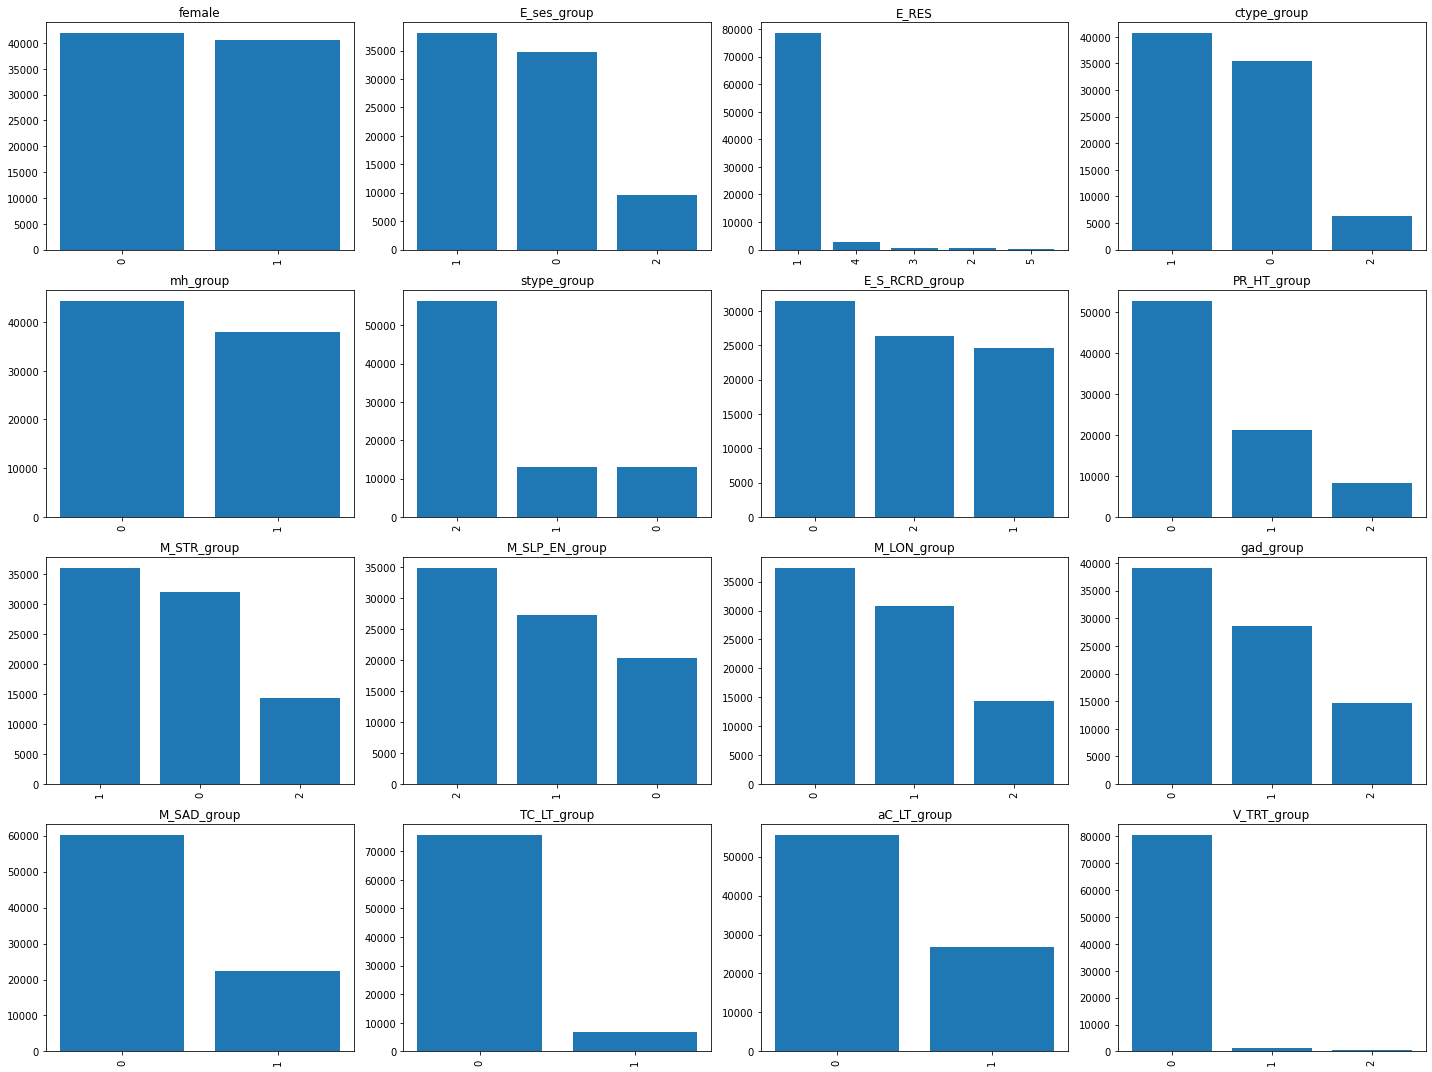

In [9]:
#변수 막대그래프
columns = ['female', 'E_ses_group', 'E_RES', 'ctype_group', 'mh_group', 'stype_group', 'E_S_RCRD_group', 'PR_HT_group', 'M_STR_group', 'M_SLP_EN_group', 'M_LON_group', 'gad_group', 'M_SAD_group', 'TC_LT_group', 'aC_LT_group', 'V_TRT_group']

# 4x4 그리드로 서브플롯 생성 (16개의 변수를 위해)
fig, axs = plt.subplots(4, 4, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for column in columns:
    value_counts = df0_train[column].value_counts() 
    #value_counts = df_train, df0_train 또는 df1_train를 넣으면 비교가 가능하다.
    trace_x = counter // 4
    trace_y = counter % 4
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.tight_layout()  # 서브플롯 간의 레이아웃을 조정하여 겹치지 않도록 함
plt.show()


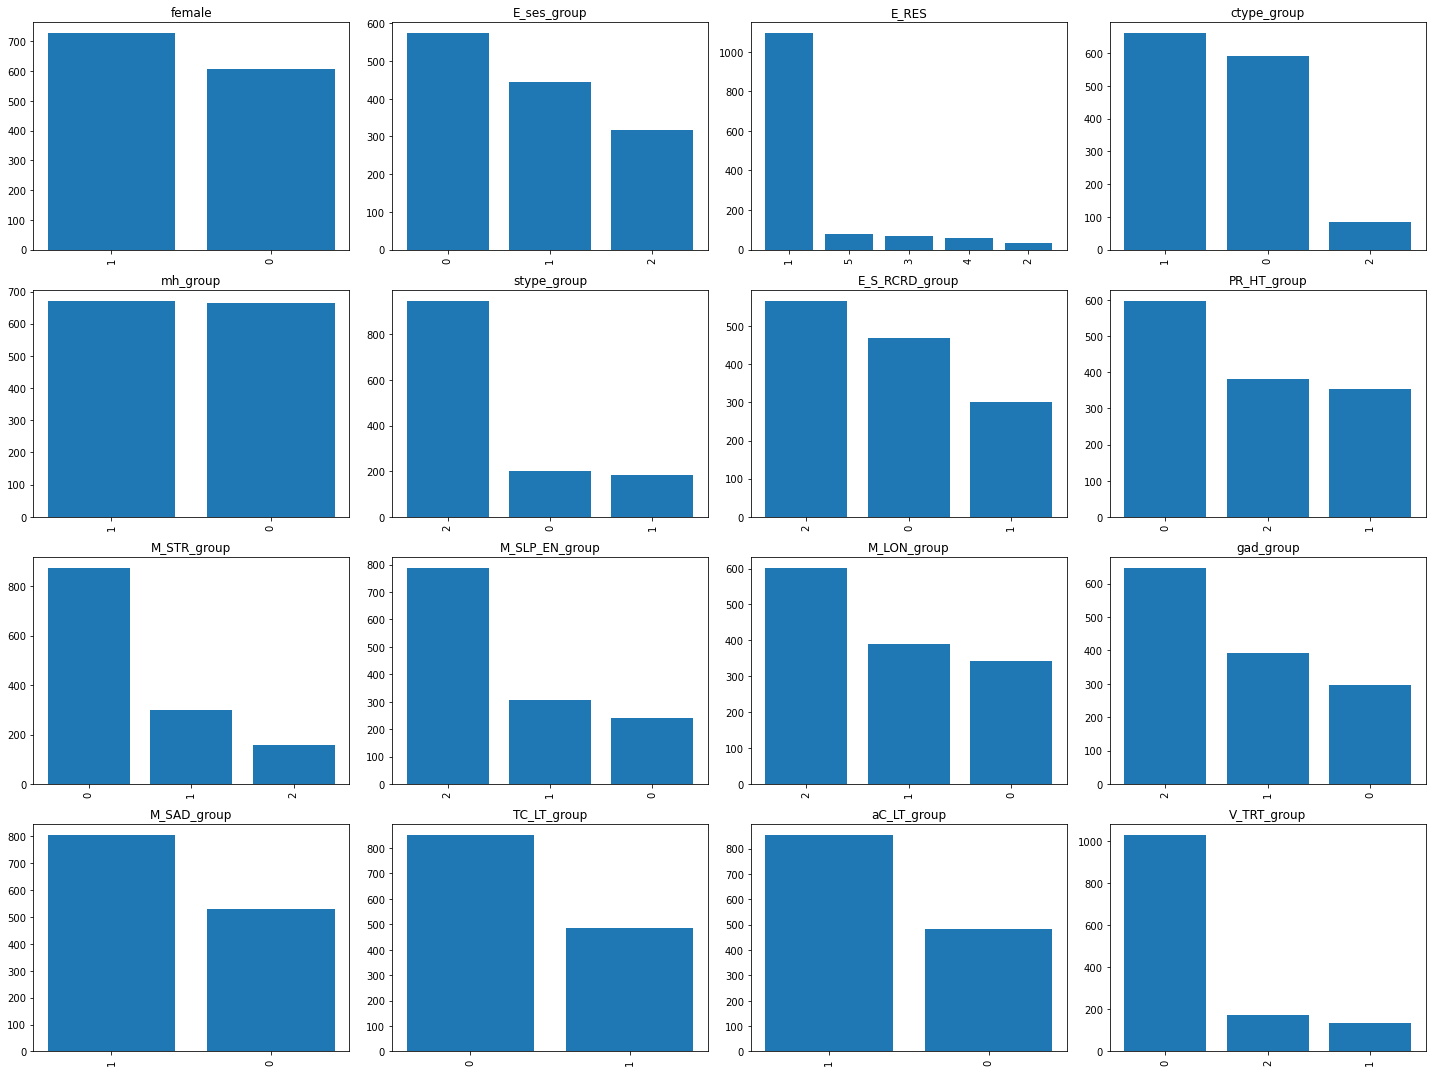

In [10]:
#변수 막대그래프
columns = ['female', 'E_ses_group', 'E_RES', 'ctype_group', 'mh_group', 'stype_group', 'E_S_RCRD_group', 'PR_HT_group', 'M_STR_group', 'M_SLP_EN_group', 'M_LON_group', 'gad_group', 'M_SAD_group', 'TC_LT_group', 'aC_LT_group', 'V_TRT_group']

# 4x4 그리드로 서브플롯 생성 (16개의 변수를 위해)
fig, axs = plt.subplots(4, 4, sharex=False, sharey=False, figsize=(20, 15))

counter = 0
for column in columns:
    value_counts = df1_train[column].value_counts() 
    #value_counts = df_train, df0_train 또는 df1_train를 넣으면 비교가 가능하다.
    trace_x = counter // 4
    trace_y = counter % 4
    x_pos = np.arange(0, len(value_counts))
    
    axs[trace_x, trace_y].bar(x_pos, value_counts.values, tick_label = value_counts.index)
    
    axs[trace_x, trace_y].set_title(column)
    
    for tick in axs[trace_x, trace_y].get_xticklabels():
        tick.set_rotation(90)
    
    counter += 1

plt.tight_layout()  # 서브플롯 간의 레이아웃을 조정하여 겹치지 않도록 함
plt.show()

**성별**  
약물을 한 남성의 비율이 올랐지만 그 차이는 미미하다.  
**경제수준**  
약x: (중, 상, 하)
약o: (상, 중, 하)의 순서로 경제수준은 영향을 미치는 듯하다.  
**거주형태**
약x: 14325 (가족과 거주, 기숙사, 하숙/자취, 친척 거주, 보육시설)
약o: 15342 (가족과 거주, 보육시설, 하숙/자취, 기숙사, 친척 거주)의 순서로 애초에 1: 가족과 거주의 표본이 많아 가족과 거주시에 더 약을 하게 된다는 가정은 무의미하다 생각된다. 다만 5: 보육시설의 순위가 눈에 띄게 달라짐은 보육시설의 청소년이 더 약을 한다는 가정은 유의미하다 생각된다.  
**학업성적**
약x: 021 (상, 하, 중)
약o: 201 (하, 상, 중)으로 학업 성적이 '하'의 경우 약을 할 확률이 높아보인다. 다만 상위권 성적의 청소년이 2위를 차지하게 되었는데 이는 추가 분석이 필요해보인다.

In [15]:
df_train.groupby('female').count()

,drug_use,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
female,,,,,,,,,,,,,,,,
0,42509,42509,42509,42509,42509,42509,42509,42509,42509,42509,42509,42509,42509,42509,42509,42509
1,41265,41265,41265,41265,41265,41265,41265,41265,41265,41265,41265,41265,41265,41265,41265,41265


In [11]:
df0_train.groupby('female').count()

,drug_use,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
female,,,,,,,,,,,,,,,,
0,41901,41901,41901,41901,41901,41901,41901,41901,41901,41901,41901,41901,41901,41901,41901,41901
1,40538,40538,40538,40538,40538,40538,40538,40538,40538,40538,40538,40538,40538,40538,40538,40538


In [20]:
df_train.groupby('drug_use').count()

,female,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
drug_use,,,,,,,,,,,,,,,,
0,82439,82439,82439,82439,82439,82439,82439,82439,82439,82439,82439,82439,82439,82439,82439,82439
1,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335,1335


In [21]:
df_test.groupby('drug_use').count()

,female,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
drug_use,,,,,,,,,,,,,,,,
0,20624,20624,20624,20624,20624,20624,20624,20624,20624,20624,20624,20624,20624,20624,20624,20624
1,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320


In [17]:
df_test.groupby('female').count()

,drug_use,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
female,,,,,,,,,,,,,,,,
0,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647,10647
1,10297,10297,10297,10297,10297,10297,10297,10297,10297,10297,10297,10297,10297,10297,10297,10297


In [19]:
df1_test.groupby('drug_use').count()

,female,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
drug_use,,,,,,,,,,,,,,,,
1,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320,320


In [39]:
df_train.groupby('PR_HT_group').count()

,drug_use,female,E_ses_group,E_RES,ctype_group,mh_group,stype_group,E_S_RCRD_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
PR_HT_group,,,,,,,,,,,,,,,,
0,53508,53508,53508,53508,53508,53508,53508,53508,53508,53508,53508,53508,53508,53508,53508,53508
1,21623,21623,21623,21623,21623,21623,21623,21623,21623,21623,21623,21623,21623,21623,21623,21623
2,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643,8643


31531 : 24554 : 26354 = 1.28 : 1.00 : 1.07

In [38]:
df1_train.groupby('E_S_RCRD_group').count()

,drug_use,female,E_ses_group,E_RES,ctype_group,mh_group,stype_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
E_S_RCRD_group,,,,,,,,,,,,,,,,
0,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468,468
1,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300,300
2,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567,567


468 : 300 : 567 = 1.56 : 1.00 : 1.89

In [21]:
#약물 사용을 안한 학교 종류의 개수
df0_train.groupby('stype_group').count()

,drug_use,female,E_ses_group,E_RES,ctype_group,mh_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
stype_group,,,,,,,,,,,,,,,,
0,12913,12913,12913,12913,12913,12913,12913,12913,12913,12913,12913,12913,12913,12913,12913,12913
1,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021,13021
2,56505,56505,56505,56505,56505,56505,56505,56505,56505,56505,56505,56505,56505,56505,56505,56505


In [20]:
#약물 사용을 한 학교 종류의 개수
df1_train.groupby('stype_group').count()

,drug_use,female,E_ses_group,E_RES,ctype_group,mh_group,E_S_RCRD_group,PR_HT_group,M_STR_group,M_SLP_EN_group,M_LON_group,gad_group,M_SAD_group,TC_LT_group,aC_LT_group,V_TRT_group
stype_group,,,,,,,,,,,,,,,,
0,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201,201
1,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185,185
2,949,949,949,949,949,949,949,949,949,949,949,949,949,949,949,949


약물 사용을 하지 않은 학교 종류(남학교, 여학교, 남여공학)와  
약물 사용을 한 학교 종류(남학교, 여학교, 남여공학)의 비는 각각

0.158: 0.159: 0.682

0.152: 0.140: 0.707로 비율의 차이가 존재한다.

# 랜덤포레스트를 이용한 변수 중요도.

In [7]:
#변수 중요도를 위한 랜덤포레스트
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer

           Feature  Importance
6   E_S_RCRD_group    0.096922
1      E_ses_group    0.091249
3      ctype_group    0.090987
9   M_SLP_EN_group    0.087451
7      PR_HT_group    0.073855
10     M_LON_group    0.070293
5      stype_group    0.062489
4         mh_group    0.060464
15     V_TRT_group    0.059713
2            E_RES    0.059239
8      M_STR_group    0.053840
11       gad_group    0.053377
0           female    0.047437
14     aC_LT_group    0.032906
12     M_SAD_group    0.030463
13     TC_LT_group    0.029314


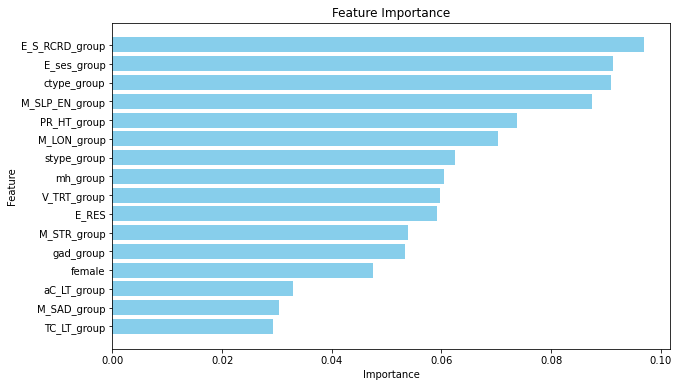

In [8]:
# 입력(features)과 타겟(target) 분리
X_train = df_train.drop(columns=['drug_use'])
y_train = df_train['drug_use']
X_test = df_test.drop(columns=['drug_use'])
y_test = df_test['drug_use']

# 랜덤 포레스트 모델 훈련
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

# 변수 중요도 계산
importances = model.feature_importances_
feature_names = X_train.columns

# 변수 중요도 출력
importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df)

# 변수 중요도 시각화
plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()
plt.show()

**변수 중요도**  
"해당 변수가 상대적으로 얼마만큼 종속변수에 영향을 주는가?"에 대한 척도

순위    
1. E_S_RCRD_group: 학업 성적  
2. ctype_group: 지역  
3. E_ses_group: 경제 수준  
4. M_SLP_EN_group: 수면 정도.

Train Accuracy: 0.9938644448158139
Test Accuracy: 0.9824770817417876
Precision: 0.19480519480519481
Recall: 0.046875
F1 Score: 0.07556675062972293
ROC AUC Score: 0.672631551832816


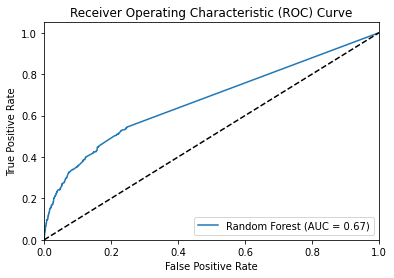

In [9]:
#랜덤포레스트
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

# 예측
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)
y_proba_test = model.predict_proba(X_test)[:, 1]

# 성능 평가
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_proba_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# ROC 곡선 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best parameters found:  {'n_estimators': 125, 'min_samples_split': 10, 'min_samples_leaf': 4, 'max_features': 'sqrt', 'max_depth': 10}
Train Accuracy: 0.9847088595506959
Test Accuracy: 0.9851031321619557
Precision: 0.7857142857142857
Recall: 0.034375
F1 Score: 0.0658682634730539
ROC AUC Score: 0.8049541795965864


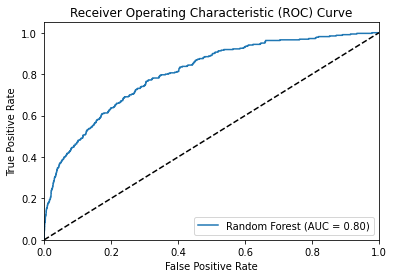

In [10]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
import numpy as np

# 랜덤 포레스트 모델 생성
model = RandomForestClassifier(random_state=42)

# 하이퍼파라미터 그리드 설정
param_dist = {
    'n_estimators': [int(x) for x in np.linspace(start=100, stop=200, num=5)],
    'max_depth': [int(x) for x in np.linspace(10, 30, num=3)] + [None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}

# RandomizedSearchCV 설정
random_search = RandomizedSearchCV(estimator=model, param_distributions=param_dist,
                                   n_iter=50, cv=3, n_jobs=-1, verbose=2, random_state=42, scoring='roc_auc')

# RandomizedSearchCV 실행
random_search.fit(X_train, y_train)

# 최적의 하이퍼파라미터 출력
print("Best parameters found: ", random_search.best_params_)

# 최적의 모델로 예측
best_model = random_search.best_estimator_

# 성능 평가
y_pred_train = best_model.predict(X_train)
y_pred_test = best_model.predict(X_test)
y_proba_test = best_model.predict_proba(X_test)[:, 1]

accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_proba_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# ROC 곡선 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


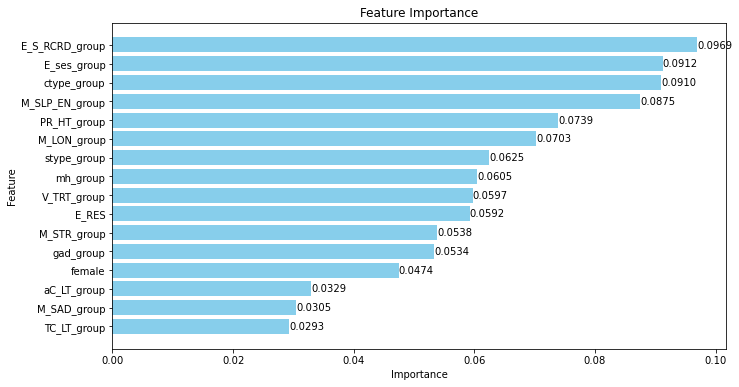

In [21]:
# 변수 중요도 추출
importances = best_model.feature_importances_

# 중요도 순으로 변수 정렬
indices = np.argsort(importances)[::-1]

# 변수 이름 가져오기 (X_train이 DataFrame일 경우)
# feature_names = X_train.columns

# X_train이 numpy 배열일 경우, 변수 이름 설정
feature_names = [f"feature {i}" for i in range(X_train.shape[1])]

# 변수 중요도 시각화
plt.figure(figsize=(11, 6))
bars = plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.gca().invert_yaxis()

# 중요도 수치 표시
for bar in bars:
    width = bar.get_width()
    plt.gca().text(width, bar.get_y() + bar.get_height() / 2,
                   f'{width:.4f}', ha='left', va='center')
plt.show()

모델의 정확도는 매우 높지만, **재현율(Recall)** 이 매우 낮다. 이는 모델이 양성 클래스를 잘 예측하지 못한다는 것을 의미한다. 실제 예측 중 제대로 예측한 비율.

In [25]:
!pip install --user scikit-learn==0.24.2 imbalanced-learn==0.8.0

  Using cached scikit_learn-0.24.2-cp39-cp39-win_amd64.whl (6.9 MB)
  Using cached imbalanced_learn-0.8.0-py3-none-any.whl (206 kB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.5.0
    Uninstalling scikit-learn-1.5.0:
      Successfully uninstalled scikit-learn-1.5.0
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.12.2
    Uninstalling imbalanced-learn-0.12.2:
      Successfully uninstalled imbalanced-learn-0.12.2


Train Classification Report
              precision    recall  f1-score   support

           0       0.99      0.81      0.89     82439
           1       0.06      0.74      0.11      1335

    accuracy                           0.81     83774
   macro avg       0.53      0.77      0.50     83774
weighted avg       0.98      0.81      0.88     83774

Test Classification Report
              precision    recall  f1-score   support

           0       0.99      0.80      0.89     20624
           1       0.04      0.53      0.08       320

    accuracy                           0.80     20944
   macro avg       0.52      0.67      0.48     20944
weighted avg       0.98      0.80      0.88     20944



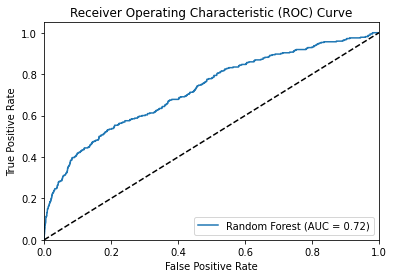

In [28]:
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report

# SMOTE 적용
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X_train, y_train)

# 모델 학습
model = RandomForestClassifier(n_estimators=125, min_samples_split=10, min_samples_leaf=4, max_features='sqrt', max_depth=10, random_state=42)
model.fit(X_res, y_res)

# 예측
y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

# 성능 평가
print("Train Classification Report")
print(classification_report(y_train, y_pred_train))
print("Test Classification Report")
print(classification_report(y_test, y_pred_test))

# ROC 곡선 시각화
y_proba_test = model.predict_proba(X_test)[:, 1]  # 양성 클래스에 대한 예측 확률
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
roc_auc = roc_auc_score(y_test, y_proba_test)

plt.figure()
plt.plot(fpr, tpr, label='Random Forest (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

비교 및 해석:

1. Accuracy: 

- SMOTE를 적용하지 않은 경우의 Train Accuracy와 Test Accuracy가 더 높다. 그러나 Accuracy는 클래스 불균형이 심한 경우 성능을 잘 나타내지 못한다.


2. Precision, Recall, F1 Score:

- SMOTE를 적용하지 않은 경우: Precision은 높지만, Recall이 매우 낮다. 이는 모델이 양성 클래스(1)를 잘 예측하지 못함을 의미한다. F1 Score 역시 낮다.


- SMOTE를 적용한 경우: Precision은 낮지만, Recall이 크게 향상되었다. 이는 모델이 양성 클래스(1)를 더 잘 예측하고 있음을 의미한다. F1 Score는 여전히 낮지만, Recall이 크게 개선되었다.

3. ROC AUC Score:

- SMOTE를 적용하지 않은 경우: 0.805


- SMOTE를 적용한 경우: 0.72, ROC AUC Score는 전체적인 모델 성능을 나타내는 지표로, SMOTE를 적용하지 않은 경우가 더 높다.

결론:
- SMOTE를 적용한 경우: 양성 클래스에 대한 Recall이 크게 향상되었다. 이는 양성 클래스 예측이 중요한 경우 (예: 사기 탐지, 질병 진단) 매우 유용하다.


- SMOTE를 적용하지 않은 경우: 전체적인 성능(Precision, ROC AUC Score 등)은 더 좋지만, 양성 클래스에 대한 예측 성능이 부족하다.

최종 선택은 목적에 따라 다르다:

- 양성 클래스(1)를 잘 예측하는 것이 중요한 경우: SMOTE를 적용한 모델이 더 나은 선택이다.


- 전체적인 예측 성능이 중요한 경우: SMOTE를 적용하지 않은 모델이 더 나을 수 있다.


- 양성 클래스에 대한 예측이 중요한 경우라면, SMOTE를 적용한 모델을 선택하는 것이 좋다. 성능을 더 개선하기 위해서는 하이퍼파라미터 튜닝과 함께 다른 기술을 시도해볼 수도 있다.

In [20]:
import xgboost
#XGBoost 모델 훈련
xgb = xgboost.XGBClassifier(n_estimators=100, learning_rate=0.08, gamma=0, subsample=0.75,
                           colsample_bytree=1, max_depth=7)
xgb.fit(X_train,y_train.squeeze().values)

#모델의 상위 15개를 계산하고 결과를 출력
y_train_preds = xgb.predict(X_train)
y_test_preds = xgb.predict(X_test)

print('XGB accuracy score for train: %.3f: test: %.3f' % (
        accuracy_score(y_train, y_train_preds),
        accuracy_score(y_test, y_test_preds)))

XGB accuracy score for train: 0.986: test: 0.985


Train Accuracy: 0.9847088595506959
Test Accuracy: 0.9851031321619557
Precision: 0.7857142857142857
Recall: 0.034375
F1 Score: 0.0658682634730539
ROC AUC Score: 0.8049541795965864


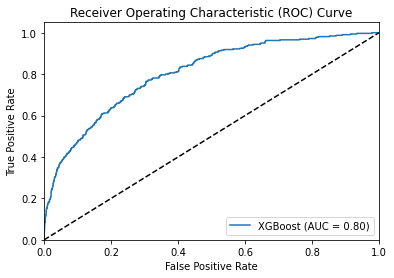

In [21]:
# 성능 평가 지표 출력
accuracy_train = accuracy_score(y_train, y_pred_train)
accuracy_test = accuracy_score(y_test, y_pred_test)
precision = precision_score(y_test, y_pred_test)
recall = recall_score(y_test, y_pred_test)
f1 = f1_score(y_test, y_pred_test)
roc_auc = roc_auc_score(y_test, y_proba_test)

print("Train Accuracy:", accuracy_train)
print("Test Accuracy:", accuracy_test)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)
print("ROC AUC Score:", roc_auc)

# ROC 곡선 시각화
fpr, tpr, thresholds = roc_curve(y_test, y_proba_test)
plt.figure()
plt.plot(fpr, tpr, label='XGBoost (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()

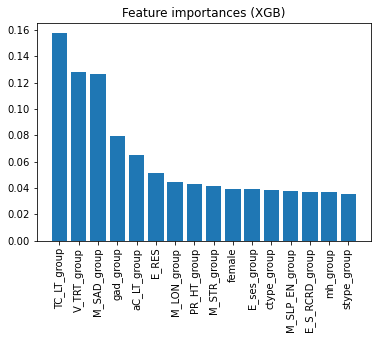

In [29]:
#훈련된 모델에서 변수 중요도 파악
headers = ["name", "score"]
values = sorted(zip(X_train.columns, xgb.feature_importances_), key=lambda x: x[1] * -1)
xgb_feature_importances = pd.DataFrame(values, columns = headers)

#플롯의 변수 중요도
x_pos = np.arange(0, len(xgb_feature_importances))
plt.bar(x_pos, xgb_feature_importances['score'])
plt.xticks(x_pos, xgb_feature_importances['name'])
plt.xticks(rotation=90)
plt.title('Feature importances (XGB)')

plt.show()

**XGBoost (Extreme Gradient Boosting)** 은 강력한 기계 학습 알고리즘으로, 특히 구조화된 데이터(표 형태의 데이터)에서 탁월한 성능을 발휘.

과학경진대회에서 유명하다.
Gradient boosting은 여러 약한 학습기(주로 의사결정나무)를 순차적으로 학습시키며, 이전 모델의 오류를 보완하도록 새로운 모델을 추가한다. 최종 예측은 이 개별 모델들의 예측을 합산하여 결정.

                drug_use    female  E_ses_group     E_RES  ctype_group  \
drug_use        1.000000  0.013234     0.021363  0.074689    -0.005502   
female          0.013234  1.000000     0.037511 -0.020739    -0.010605   
E_ses_group     0.021363  0.037511     1.000000  0.059028     0.039371   
E_RES           0.074689 -0.020739     0.059028  1.000000     0.116137   
ctype_group    -0.005502 -0.010605     0.039371  0.116137     1.000000   
mh_group        0.010589 -0.005015     0.099015  0.159274     0.001031   
stype_group     0.005264  0.198007    -0.011704  0.017917     0.074504   
E_S_RCRD_group  0.020504  0.000123     0.271160  0.007904     0.021074   
PR_HT_group     0.070221  0.093453     0.133289  0.015802     0.010170   
M_STR_group    -0.055622 -0.147527    -0.090487 -0.008077     0.004962   
M_SLP_EN_group  0.036463  0.132894     0.076943  0.040562    -0.023990   
M_LON_group     0.079808  0.156056     0.109752  0.026360     0.002317   
gad_group       0.092673  0.174810    

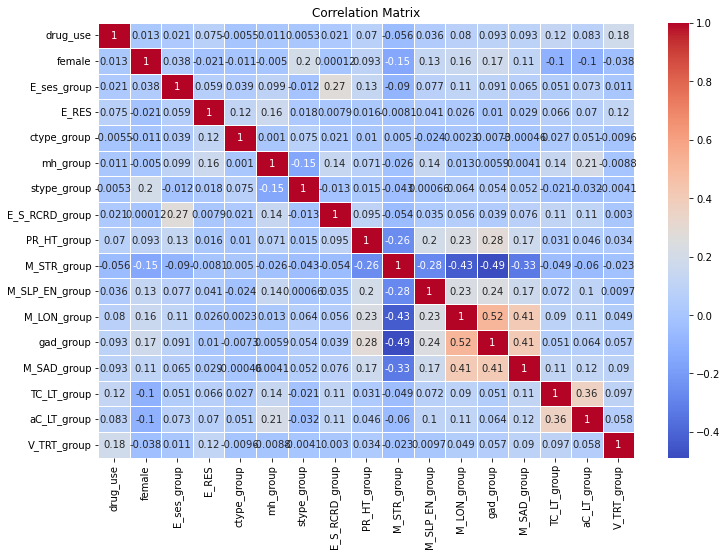

In [29]:
# 훈련 데이터셋에서 상관관계 계산
correlation_matrix = df_train.corr()

# 상관관계 행렬 출력
print(correlation_matrix)

# 상관관계 히트맵 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

이 코드를 실행하면 훈련 데이터셋의 변수들 간 상관관계 행렬이 계산되고,  
히트맵을 통해 상관관계를 시각화 한다. 

상관계수 값은 -1에서 1 사이의 값을 가지며,   
1에 가까울수록 강한 양의 상관관계,  
-1에 가까울수록 강한 음의 상관관계를 나타낸다. 

0에 가까울수록 상관관계가 거의 없음을 의미한다.

***양의 상관관계**

**상관관계 > 0.4**
- 불안 정도와 외로움 정도: 0.52
- 슬픔 정도와 외로움 정도: 0.41
- 슬픔과 불안: 0.41  

**상관관계 =< 0.4, 0.4 이하**
- 흡연경험과 음주경험: 0.36
- 불안 정도와 건강 상태: 0.28
- 경제수준과 학업 성적: 0.27
- 불안 정도와 수면 정도: 0.24
- 외로움과 수면 정도: 0.23  

**상관관계 =< 0.2**
- 수면정도와 건강상태: 0.2
- 슬픔 정도와 건강상태: 0.17

***음의 상관관계**

- 스트레스 정도와 불안 정도: 0.49 >> 스트레스가 많을수록(많음:0) 불안 정도가 크다(중증 불안:2)
- 스트레스 정도와 외로움 정도: 0.43
- 스트레스 정도와 슬픔 정도: 0.33
- 스트레스 정도와 수면 정도: 0.28

In [24]:
# 머신러닝 입력

from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
import xgboost as xgb
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, RandomizedSearchCV, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report, roc_curve
import pandas as pd

## 머신러닝의 장단점

1. 의사결정트리 (Decision Tree)

**특징**  
- 데이터를 분할하여 의사결정을 수행하는 트리 구조.
- 각 내부 노드는 데이터셋의 하나의 특성에 대한 테스트를 나타내고, 각 리프 노드는 클래스 레이블을 나타냄.

장점
- 이해하고 해석하기 쉬움. 시각화가 용이함.
- 데이터 전처리 과정이 간단하며, 비정규화 데이터도 처리 가능.
- 범주형 및 연속형 데이터를 모두 처리할 수 있음.

단점
- 과적합(overfitting) 가능성이 큼.
- 작은 변화에도 불안정하게 작용할 수 있음.
- 트리 깊이가 깊어질수록 계산 복잡도가 증가함.

2. 랜덤포레스트 (Random Forest)

**특징**  
여러 개의 의사결정트리를 사용하여 앙상블을 구축한 모델.
각 트리는 데이터의 무작위 부분 집합으로 훈련되고, 예측 시 다수결 투표를 통해 최종 결정을 내림.

장점
- 과적합을 방지하고 일반화 성능이 뛰어남.
- 고차원 데이터에서 효과적이며, 변수 중요도를 제공함.
- 이상치(outlier)에 덜 민감함.

단점
- 의사결정트리보다 해석하기 어려움.
- 훈련 속도가 느리고 메모리 사용량이 많음.
- 모델 복잡도가 높아지면 예측 시간도 증가할 수 있음.

3. k-최근접이웃 (k-Nearest Neighbors, KNN)
**특징**  
- 새로운 데이터 포인트의 레이블을 예측할 때 가장 가까운 k개의 이웃 데이터를 참조하여 다수결로 클래스를 결정.

장점
- 이해하고 구현하기 쉬움.
- 훈련 과정이 빠르고 데이터에 대한 가정이 거의 없음.
- 다차원 공간에서도 성능이 좋음.

단점
- 예측 시 모든 데이터를 사용하기 때문에 속도가 느림.
- 메모리 사용량이 큼.
- 데이터가 많을수록 계산량이 증가하며, 이상치와 노이즈에 민감함.

4. 나이브베이즈 (Naive Bayes)
**특징**
- 베이즈 정리를 기반으로 하며, 각 특징이 독립적이라고 가정함.
- 여러 가지 종류가 있으며 (가우시안, 다항, 베르누이), 데이터 유형에 따라 선택함.

장점
- 구현이 쉽고 빠르며, 훈련 속도가 매우 빠름.
- 적은 데이터에서도 성능이 좋음.
- 텍스트 분류와 같은 고차원 데이터에 효과적.

단점
- 특징 간의 독립성 가정이 현실에서는 거의 성립하지 않음.
- 연속형 데이터에서는 성능이 떨어질 수 있음.
- 다른 모델들에 비해 예측 성능이 떨어질 수 있음.

**결론**

의사결정트리는 해석이 용이하고 직관적이지만, 과적합 문제를 해결하기 위해 가지치기(pruning) 기법 등을 사용.

랜덤포레스트는 다수의 트리를 사용하여 과적합을 방지하고 좋은 성능을 보장하지만, 해석이 어렵고 계산 비용이 많이 듦.

k-최근접이웃은 이해하기 쉽고 구현이 간단하지만, 큰 데이터셋에서는 계산 비용이 크며, 이상치에 민감함.

나이브베이즈는 빠르고 간단하지만, 특징 간의 독립성 가정 때문에 실제 데이터에 대해 성능이 제한될 수 있음.

In [19]:
# KNearestNeighbors
knn_clf = KNeighborsClassifier()
knn_scores = cross_val_score(knn_clf, X_train, y_train, cv=3)
knn_mean = knn_scores.mean()

# 의사나무
tree_clf = tree.DecisionTreeClassifier()
tree_scores = cross_val_score(tree_clf, X_train, y_train, cv=3)
tree_mean = tree_scores.mean()

# Random Forest Classifier
rand_clf = RandomForestClassifier(n_estimators=18)
rand_scores = cross_val_score(rand_clf, X_train, y_train, cv=3)
rand_mean = rand_scores.mean()

# Naive Bayes
nav_clf = GaussianNB()
nav_scores = cross_val_score(nav_clf, X_train, y_train, cv=3)
nav_mean = nav_scores.mean()

# 결과로 데이터프레임 만들기
d = {'Classifiers': ['KNN', 'Decision Tree', 'Random Forest', 'Naive Bayes'], 
     'Crossval Mean Scores': [knn_mean, tree_mean, rand_mean, nav_mean]}

result_df = pd.DataFrame(data=d)
print(result_df)

     Classifiers  Crossval Mean Scores
0            KNN              0.983766
1  Decision Tree              0.971137
2  Random Forest              0.981713
3    Naive Bayes              0.924153


KNN과 Random Forest는 주어진 데이터셋에서 가장 높은 성능을 보인다.  

두 모델 모두 약 98% 이상의 정확도를 보이며, 예측 성능이 매우 우수하다.  

Decision Tree도 높은 성능을 보이며, 약 97%의 정확도로 예측을 수행한다.  

Naive Bayes는 가장 낮은 성능을 보이지만, 여전히 약 92%의 정확도를 나타내며 기본적인 모델로서 괜찮은 성능을 보인다.  

따라서, 높은 예측 성능을 원한다면 KNN 또는 Random Forest 모델을 사용하는 것이 좋다.   
Naive Bayes는 빠르고 간단한 모델로 사용할 수 있지만, 정확도 측면에서 다른 모델들보다 낮은 성능을 보일 수 있다.

Training KNN...


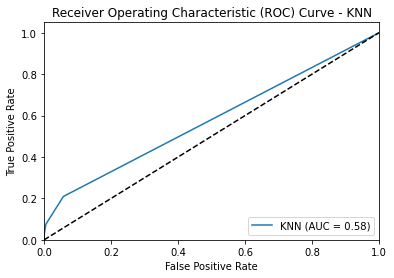

Training Decision Tree...


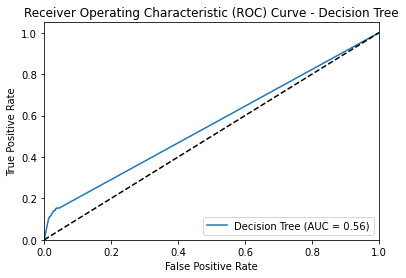

Training Random Forest...


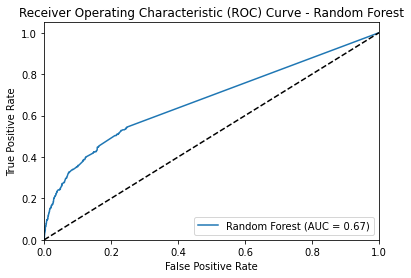

Training Naive Bayes...


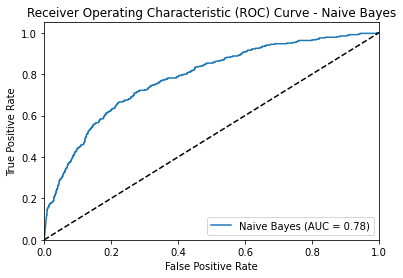

Results for KNN:
Train Accuracy: 0.9848
Test Accuracy: 0.9847
Precision: 0.5000
Recall: 0.0312
F1 Score: 0.0588
ROC AUC Score: 0.5777
              precision    recall  f1-score   support

           0       0.99      1.00      0.99     20624
           1       0.50      0.03      0.06       320

    accuracy                           0.98     20944
   macro avg       0.74      0.52      0.53     20944
weighted avg       0.98      0.98      0.98     20944



Results for Decision Tree:
Train Accuracy: 0.9939
Test Accuracy: 0.9735
Precision: 0.1074
Recall: 0.1000
F1 Score: 0.1036
ROC AUC Score: 0.5558
              precision    recall  f1-score   support

           0       0.99      0.99      0.99     20624
           1       0.11      0.10      0.10       320

    accuracy                           0.97     20944
   macro avg       0.55      0.54      0.55     20944
weighted avg       0.97      0.97      0.97     20944



Results for Random Forest:
Train Accuracy: 0.9939
Test Accuracy:

In [25]:
#더 상세하게.

# 모델 리스트
models = {
    'KNN': KNeighborsClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'Naive Bayes': GaussianNB()
}

# 성능 지표 계산
results = {}

for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else np.zeros_like(y_pred_test)
    
    train_accuracy = accuracy_score(y_train, y_pred_train)
    test_accuracy = accuracy_score(y_test, y_pred_test)
    precision = precision_score(y_test, y_pred_test)
    recall = recall_score(y_test, y_pred_test)
    f1 = f1_score(y_test, y_pred_test)
    roc_auc = roc_auc_score(y_test, y_proba_test)
    
    results[name] = {
        'Train Accuracy': train_accuracy,
        'Test Accuracy': test_accuracy,
        'Precision': precision,
        'Recall': recall,
        'F1 Score': f1,
        'ROC AUC Score': roc_auc,
        'Classification Report': classification_report(y_test, y_pred_test)
    }

    # ROC 곡선 시각화
    fpr, tpr, _ = roc_curve(y_test, y_proba_test)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {name}')
    plt.legend(loc="lower right")
    plt.show()

# 결과 출력
for name, metrics in results.items():
    print(f"Results for {name}:")
    for metric, value in metrics.items():
        if metric != 'Classification Report':
            print(f"{metric}: {value:.4f}")
        else:
            print(value)
    print("\n")

In [27]:
#주성분 분석(PCA)를 이용하여 차원축소하기.

from sklearn.decomposition import PCA
pca = PCA(n_components=10)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

In [ ]:
#KNN과 의사나무 성능 올리기.

from imblearn.over_sampling import SMOTE
from scipy.stats import randint
from sklearn.preprocessing import StandardScaler

# 데이터 정규화
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# SMOTE로 데이터 불균형 해결
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train_scaled, y_train)

# KNN 모델 하이퍼파라미터 튜닝 (랜덤 서치)
param_dist_knn = {
    'n_neighbors': randint(1, 20),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

random_search_knn = RandomizedSearchCV(KNeighborsClassifier(), param_distributions=param_dist_knn, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_knn.fit(X_train_res, y_train_res)
best_knn = random_search_knn.best_estimator_

# 의사결정트리 모델 하이퍼파라미터 튜닝 (랜덤 서치)
param_dist_tree = {
    'max_depth': randint(3, 10),
    'min_samples_split': randint(2, 20),
    'min_samples_leaf': randint(1, 20),
    'max_features': ['auto', 'sqrt', 'log2']
}

random_search_tree = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=param_dist_tree, n_iter=20, cv=5, scoring='roc_auc', n_jobs=-1, random_state=42)
random_search_tree.fit(X_train_res, y_train_res)
best_tree = random_search_tree.best_estimator_

# 모델 평가 및 ROC 곡선 시각화 함수
def evaluate_and_plot_roc(model, X_train, X_test, y_train, y_test, model_name):
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    y_proba_test = model.predict_proba(X_test)[:, 1]
    
    print(f"Train Classification Report - {model_name}")
    print(classification_report(y_train, y_pred_train))
    print(f"Test Classification Report - {model_name}")
    print(classification_report(y_test, y_pred_test))

    roc_auc = roc_auc_score(y_test, y_proba_test)
    fpr, tpr, _ = roc_curve(y_test, y_proba_test)
    plt.figure()
    plt.plot(fpr, tpr, label=f'{model_name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic (ROC) Curve - {model_name}')
    plt.legend(loc="lower right")
    plt.show()

# 모델 평가 및 ROC 곡선 시각화
evaluate_and_plot_roc(best_knn, X_train_scaled, X_test_scaled, y_train, y_test, "KNN")
evaluate_and_plot_roc(best_tree, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree")

시간 너무 오래 걸려서 포기